# SALMON - Paper Results

This notebook contains all of the code used to generate the results seen in the paper.

Code used in the paper will be displayed here in corresponding sections.

Toggle `DATAFRAME_AS_LATEX` to showcase resulting `DataFrame` objects as LaTeX or as a native notebook rendering.

Toggle `SAVE_PLOTS` to enable/disable overwriting renderings in `./paper_plots`.

In [1]:
%matplotlib inline

DATAFRAME_AS_LATEX = True  
SAVE_PLOTS = True

def print_dataframe(df, name):
    if "." not in name:
        name += ".tex"
    name = "./tables/" + name
    if DATAFRAME_AS_LATEX:
        latex_output = df.to_latex()
        print(latex_output)
        with open(name, "w") as f:
            f.write(latex_output)
    else:
        print(df)
        
def handle_plot(fig, name, **kwargs):
    if SAVE_PLOTS:
        if "." not in name:
            name += ".png"
        name = "./plots/" + name
        fig.savefig(name, dpi=150, bbox_inches="tight", **kwargs)
    return

## Section 1.

_no SALMON specific code used_

## Section 2.

In [2]:
from salmon import *
import pandas as pd

# shuffle for a good representative 'head' to showcase dataset
full_data = pd.read_csv("../data/AmesHousing.csv").sample(frac=1, random_state=12312).reset_index(drop=True)  
full_data = full_data.drop([2438, 1989, 1134, 2775]).reset_index(drop=True)
full_data = full_data.drop([442, 1671]).reset_index(drop=True) # Dropping some extreme outliers

In [5]:
data = full_data[["SalePrice"]].copy()
data.columns = ("Price($)",)
data["Style"] =  full_data["House Style"].apply(lambda x: x.replace("Story", " Story") if x in set(["1Story", "2Story",]) else "Other")
data["Sq. Ft."] = full_data["Gr Liv Area"]
data["Fire?"] = full_data["Fireplace Qu"].apply(lambda x: "No" if pd.isna(x) else "Yes")
print_dataframe(data.head(), "data_head")

\begin{tabular}{lrlrl}
\toprule
{} &  Price(\$) &    Style &  Sq. Ft. & Fire? \\
\midrule
0 &    162000 &  2 Story &     1400 &    No \\
1 &    195000 &  2 Story &     1660 &    No \\
2 &    164000 &    Other &     1646 &   Yes \\
3 &    417500 &  1 Story &     2464 &   Yes \\
4 &    186800 &  1 Story &     1400 &    No \\
\bottomrule
\end{tabular}



In [9]:
x = Q("Sq. Ft.")
y = Q("Price($)")
simple_model = LinearModel(x, y)
print(simple_model)

Price($) ~ 1+Sq. Ft.


In [10]:
no_intercept_model = LinearModel(x - 1, y) 
no_intercept_model = LinearModel(x, y, intercept=False)
print(no_intercept_model)

Price($) ~ Sq. Ft.


In [11]:
print_dataframe(simple_model.fit(data), name="simple_model_output")

\begin{tabular}{lrrrrrr}
\toprule
{} &  Coefficient &    SE &     t &      p &  2.5\% &  97.5\% \\
\midrule
Sq. Ft.   &        118.5 & 2.068 & 57.33 &  0.000 & 114.5 &  122.6 \\
Intercept &         3614 &  3254 & 1.111 & 0.2668 & -2766 &   9995 \\
\bottomrule
\end{tabular}



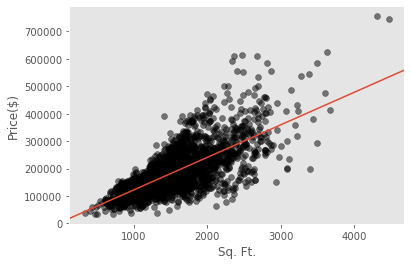

In [12]:
handle_plot(simple_model.plot(), name="simple_model_output")

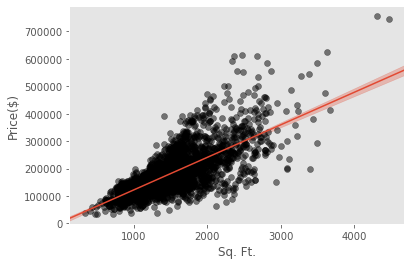

In [13]:
alpha_val = 0.05
handle_plot(simple_model.plot(confidence_band=alpha_val), name="simple_model_output_conf_band")

In [14]:
simple_log_model = LinearModel(Q("Sq. Ft."), Log(Q("Price($)")))
print(simple_log_model)

log(Price($)) ~ 1+Sq. Ft.


In [15]:
print_dataframe(simple_log_model.fit(data), name="simple_log_model_output")

\begin{tabular}{lrrrrrr}
\toprule
{} &  Coefficient &       SE &     t &     p &     2.5\% &    97.5\% \\
\midrule
Sq. Ft.   &     5.906e-4 & 1.055e-5 & 55.96 & 0.000 & 5.699e-4 & 6.113e-4 \\
Intercept &        11.14 &   0.0166 & 670.6 & 0.000 &    11.11 &    11.17 \\
\bottomrule
\end{tabular}



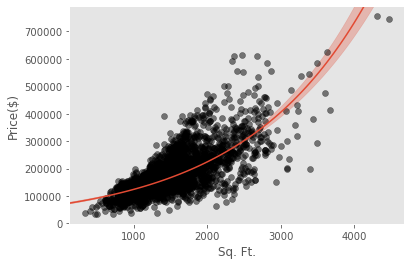

In [16]:
handle_plot(simple_log_model.plot(confidence_band=alpha_val), name="simple_log_model_output")

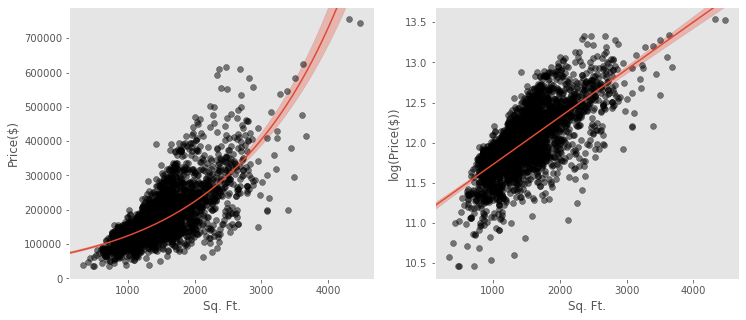

In [17]:
handle_plot(simple_log_model.plot(confidence_band=alpha_val, transformed_y_space=True, figsize=(12, 5)), name="simple_log_model_both_outputs")

In [18]:
poly_model = LinearModel(Poly(Q("Sq. Ft."), 2), Log(Q("Price($)")))
# Poly(Q("Sq. Ft."), 2) is equivalent to Q("Sq. Ft.") + Q("Sq. Ft.") ** 2
print(poly_model)

log(Price($)) ~ 1+Sq. Ft.+Sq. Ft.^2


In [19]:
print_dataframe(poly_model.fit(data), name="poly_model_output")

\begin{tabular}{lrrrrrr}
\toprule
{} &  Coefficient &       SE &      t &       p &      2.5\% &     97.5\% \\
\midrule
Sq. Ft.   &     9.989e-4 & 4.603e-5 &  21.70 & 5.9e-97 &  9.087e-4 &    0.0011 \\
Sq. Ft.\textasciicircum 2 &    -1.180e-7 & 1.296e-8 & -9.107 & 1.5e-19 & -1.434e-7 & -9.261e-8 \\
Intercept &        10.82 &   0.0386 &  280.3 &   0.000 &     10.75 &     10.90 \\
\bottomrule
\end{tabular}



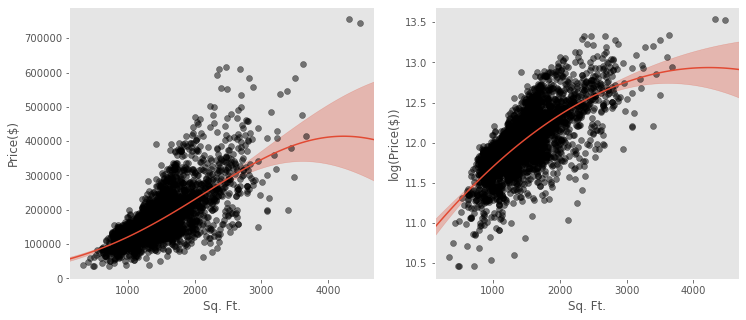

In [20]:
handle_plot(poly_model.plot(confidence_band=alpha_val, transformed_y_space=True, figsize=(12, 5)), name="poly_model_outputs")

In [21]:
simple_cat_model = LinearModel(
    C("Style") + C("Fire?"), 
    Log(Q("Price($)")),
)
print(simple_cat_model)

log(Price($)) ~ 1+Fire?+Style


In [22]:
print_dataframe(simple_cat_model.fit(data), name="simple_cat_model_output")

\begin{tabular}{lrrrrrr}
\toprule
{} &  Coefficient &     SE &      t &       p &    2.5\% &   97.5\% \\
\midrule
Style\{2 Story\} &       0.1058 & 0.0143 &  7.374 & 2.1e-13 &  0.0777 &  0.1339 \\
Style\{Other\}   &      -0.1500 & 0.0164 & -9.156 & 9.8e-20 & -0.1821 & -0.1179 \\
Fire?\{Yes\}     &       0.3966 & 0.0124 &  31.87 &  1e-191 &  0.3722 &  0.4210 \\
Intercept      &        11.82 & 0.0105 &   1124 &   0.000 &   11.80 &   11.84 \\
\bottomrule
\end{tabular}



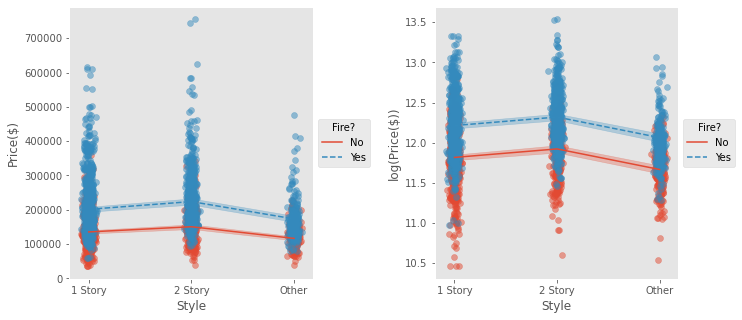

In [23]:
handle_plot(simple_cat_model.plot(confidence_band=alpha_val, transformed_y_space=True, figsize=(12,5)), name="simple_cat_model_output")

In [24]:
house, fire = C("Style"), C("Fire?")
interaction_model = LinearModel(
        house & fire, # or: house + fire + house * fire, 
        Log(Q("Price($)")))
print(interaction_model)

log(Price($)) ~ (Fire?)(Style)+1+Fire?+Style


In [25]:
print_dataframe(interaction_model.fit(data), name="interaction_model_output")

\begin{tabular}{lrrrrrr}
\toprule
{} &  Coefficient &     SE &       t &        p &    2.5\% &   97.5\% \\
\midrule
Style\{2 Story\}               &       0.1123 & 0.0217 &   5.179 & 2.385e-7 &  0.0698 &  0.1548 \\
Style\{Other\}                 &      -0.0740 & 0.0223 &  -3.318 & 9.181e-4 & -0.1177 & -0.0303 \\
Fire?\{Yes\}                   &       0.4347 & 0.0173 &   25.13 &   3e-126 &  0.4008 &  0.4687 \\
(Style\{2 Story\})(Fire?\{Yes\}) &      -0.0190 & 0.0289 & -0.6593 &   0.5097 & -0.0756 &  0.0376 \\
(Style\{Other\})(Fire?\{Yes\})   &      -0.1638 & 0.0327 &  -5.008 & 5.813e-7 & -0.2280 & -0.0997 \\
Intercept                    &        11.80 & 0.0119 &   987.7 &    0.000 &   11.78 &   11.82 \\
\bottomrule
\end{tabular}



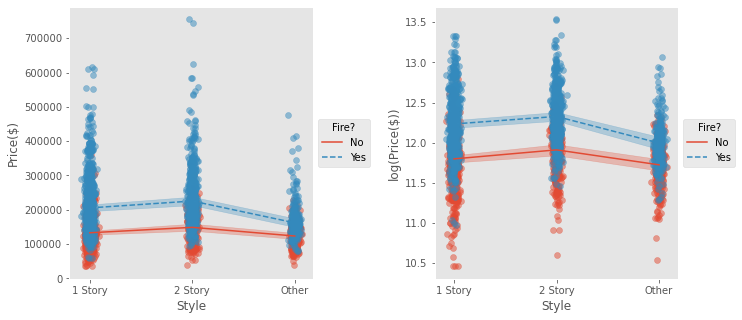

In [26]:
handle_plot(interaction_model.plot(confidence_band=alpha_val, transformed_y_space=True, figsize=(12,5)), name="interaction_model_output")

In [27]:
house, fire, sqft = C("Style"), C("Fire?"), Q("Sq. Ft.")
quant_cat_model = LinearModel(
        (house & fire) + sqft, 
        Log(Q("Price($)")))
print(quant_cat_model)

log(Price($)) ~ (Fire?)(Style)+1+Fire?+Sq. Ft.+Style


In [28]:
print_dataframe(quant_cat_model.fit(data), name="quant_cat_model_output")

\begin{tabular}{lrrrrrr}
\toprule
{} &  Coefficient &       SE &      t &        p &     2.5\% &    97.5\% \\
\midrule
Style\{2 Story\}               &      -0.1524 &   0.0171 & -8.926 &  7.7e-19 &  -0.1859 &  -0.1189 \\
Style\{Other\}                 &      -0.1535 &   0.0167 & -9.184 &  7.7e-20 &  -0.1863 &  -0.1207 \\
Fire?\{Yes\}                   &       0.2160 &   0.0137 &  15.79 &  5.7e-54 &   0.1892 &   0.2428 \\
(Style\{2 Story\})(Fire?\{Yes\}) &      -0.0389 &   0.0215 & -1.807 &   0.0709 &  -0.0811 &   0.0033 \\
(Style\{Other\})(Fire?\{Yes\})   &      -0.1478 &   0.0244 & -6.057 & 1.564e-9 &  -0.1957 &  -0.1000 \\
Sq. Ft.                      &     5.732e-4 & 1.188e-5 &  48.24 &    0.000 & 5.499e-4 & 5.965e-4 \\
Intercept                    &        11.15 &   0.0161 &  691.6 &    0.000 &    11.12 &    11.18 \\
\bottomrule
\end{tabular}



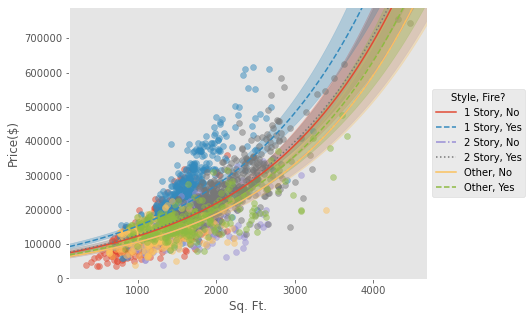

In [29]:
handle_plot(quant_cat_model.plot(confidence_band=alpha_val, figsize=(8,5)), name="quant_cat_model_output")

In [30]:
house, fire, sqft = C("Style"), C("Fire?"), Q("Sq. Ft.")
full_model = LinearModel(
        house & fire & sqft,  # TODO: Look into error when it is sqft * cat_vars 
        Log(Q("Price($)")))
print(full_model)

log(Price($)) ~ (Fire?)(Sq. Ft.)+(Fire?)(Sq. Ft.)(Style)+(Fire?)(Style)+(Sq. Ft.)(Style)+1+Fire?+Sq. Ft.+Style


In [31]:
print_dataframe(full_model.fit(data), name="full_model_output")

\begin{tabular}{lrrrrrr}
\toprule
{} &  Coefficient &       SE &       t &        p &      2.5\% &     97.5\% \\
\midrule
Style\{2 Story\}                        &       0.2222 &   0.0666 &   3.338 & 8.550e-4 &    0.0917 &    0.3527 \\
Style\{Other\}                          &       0.4554 &   0.0621 &   7.331 &  2.9e-13 &    0.3336 &    0.5772 \\
Fire?\{Yes\}                            &       0.0592 &   0.0513 &   1.155 &   0.2482 &   -0.0413 &    0.1598 \\
(Style\{2 Story\})(Fire?\{Yes\})          &      -0.0766 &   0.0886 & -0.8640 &   0.3877 &   -0.2504 &    0.0972 \\
(Style\{Other\})(Fire?\{Yes\})            &      -0.0236 &   0.0872 & -0.2713 &   0.7862 &   -0.1946 &    0.1473 \\
Sq. Ft.                               &     7.457e-4 & 2.922e-5 &   25.52 &   8e-130 &  6.884e-4 &  8.029e-4 \\
(Style\{2 Story\})(Sq. Ft.)             &    -2.852e-4 & 4.556e-5 &  -6.260 &  4.4e-10 & -3.746e-4 & -1.959e-4 \\
(Style\{Other\})(Sq. Ft.)               &    -4.985e-4 & 4.912e-5 &  -10.15 & 

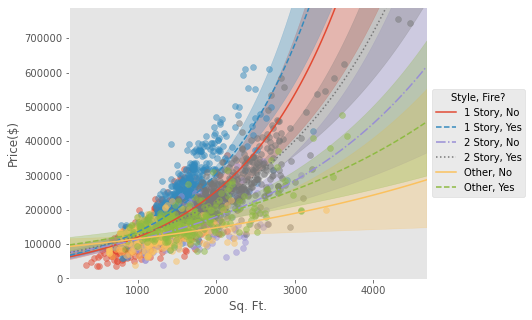

In [32]:
handle_plot(full_model.plot(confidence_band=alpha_val, figsize=(8,5)), name="full_model_output")

In [33]:
new_data = data.head()
print_dataframe(full_model.predict(new_data), name="full_model_predictions")

\begin{tabular}{lr}
\toprule
{} &  Predicted log(Price(\$)) \\
\midrule
0 &                    11.82 \\
1 &                    11.94 \\
2 &                    12.00 \\
3 &                    13.00 \\
4 &                    12.00 \\
\bottomrule
\end{tabular}



In [34]:
print_dataframe(full_model.predict(new_data, prediction_interval=alpha_val), name="full_model_predictions_interval")

\begin{tabular}{lrrr}
\toprule
{} &  Predicted log(Price(\$)) &  2.5\% &  97.5\% \\
\midrule
0 &                    11.82 & 11.36 &  12.29 \\
1 &                    11.94 & 11.48 &  12.41 \\
2 &                    12.00 & 11.54 &  12.47 \\
3 &                    13.00 & 12.53 &  13.47 \\
4 &                    12.00 & 11.53 &  12.46 \\
\bottomrule
\end{tabular}



## Section 3

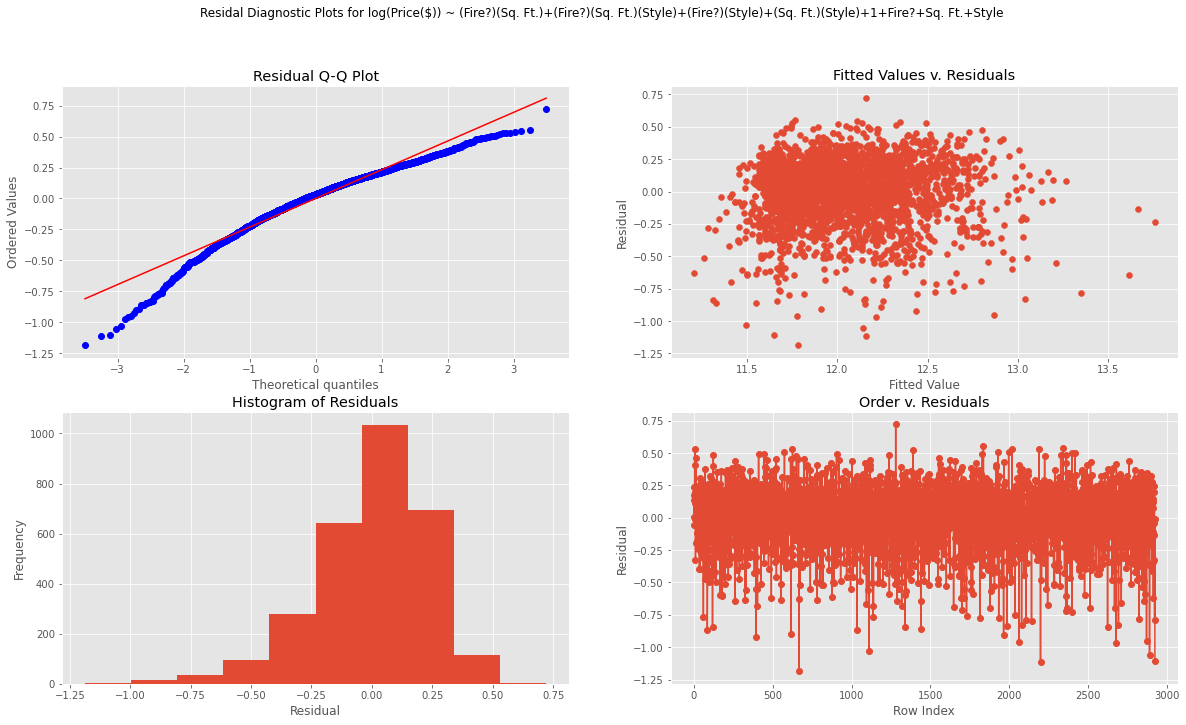

In [35]:
handle_plot(full_model.plot_residual_diagnostics(figsize=(20, 11))[0], name="full_model_resid_diagnostics")

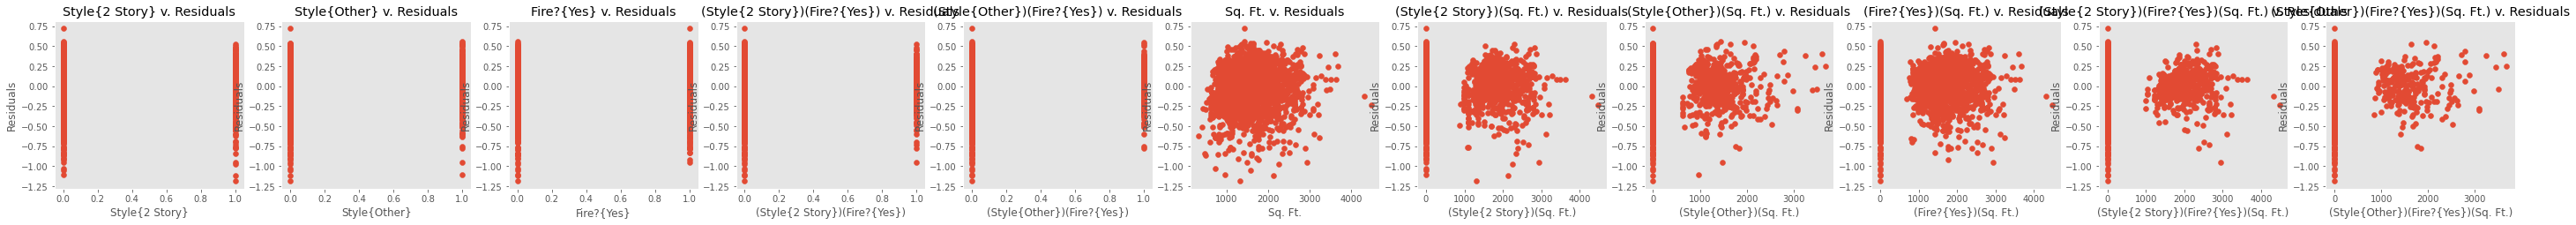

In [36]:
handle_plot(full_model.residual_plots(figsize=(50, 3.5))[0], name="full_model_residual_plots")

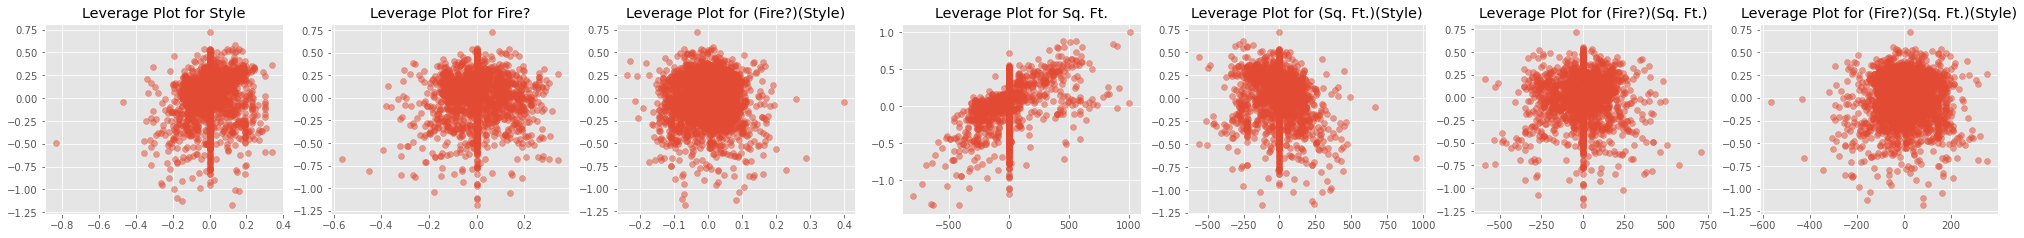

In [37]:
handle_plot(full_model.partial_plots(figsize=(35, 3.5))[0], name="full_model_partial_plots")

In [38]:
full_model.r_squared(adjusted=False)

LightDataFrame(0.65274838)

In [39]:
print_dataframe(anova(full_model), name="full_model_anova")

\begin{tabular}{lrllll}
\toprule
{} &    DF &             SS Err. &             SS Reg. &                    F &       p \\
\midrule
Global Test               &    11 &   309.5781289058364 &   309.5781289058364 &   500.76535612020103 &   0.000 \\
- Style                   &     2 &  166.77676145461209 &  306.45840314596677 &    27.75512025552433 & 1.1e-12 \\
- Fire?                   &     1 &  163.73199172000287 &    309.503172880576 &    1.333715624456426 &  0.2482 \\
- (Fire?)(Style)          &     2 &  163.69902113392453 &   309.5361434666543 &  0.37352991999170193 &  0.6883 \\
- Sq. Ft.                 &     1 &  200.26332829354106 &   272.9718363070378 &    651.3470294459581 &  8e-130 \\
- (Sq. Ft.)(Style)        &     2 &  169.81984169696094 &  303.41532290361795 &   54.828351870963054 & 4.2e-24 \\
- (Fire?)(Sq. Ft.)        &     1 &   163.7962525438744 &  309.43891205670445 &    2.477128239255519 &  0.1156 \\
- (Fire?)(Sq. Ft.)(Style) &     2 &  163.72162546077865 &   309.51353

In [40]:
print_dataframe(anova(full_model, quant_cat_model), name="anova_comparison")

\begin{tabular}{lrllll}
\toprule
{} &    DF &             SS Err. &             SS Reg. &                  F &       p \\
\midrule
Full Model      &    11 &  163.65703569474243 &   309.5781289058364 &                    &         \\
- Reduced Model &     5 &   179.0155483810085 &  294.21961621957036 &  54.65574853234809 & 2.0e-54 \\
Error           &  2912 &                     &                     &                    &         \\
\bottomrule
\end{tabular}



## Section 4

In [41]:
quant_vars = Poly(Cen(Q("Sq. Ft.")), 2)
all_terms_model = LinearModel(
    (1 +  C("Style")) * (1 +  C("Fire?")) * (1 + quant_vars),
    Log(Q("Price($)")))
print(all_terms_model)

log(Price($)) ~ (Fire?)(Sq. Ft.-E(Sq. Ft.))+(Fire?)(Sq. Ft.-E(Sq. Ft.))(Style)+(Fire?)(Sq. Ft.-E(Sq. Ft.)^2)+(Fire?)(Sq. Ft.-E(Sq. Ft.)^2)(Style)+(Fire?)(Style)+(Sq. Ft.-E(Sq. Ft.))(Style)+(Sq. Ft.-E(Sq. Ft.)^2)(Style)+1+Fire?+Sq. Ft.-E(Sq. Ft.)+Sq. Ft.-E(Sq. Ft.)^2+Style


In [42]:
results = stepwise(
    full_model=all_terms_model,
    metric_name="BIC",
    forward=True,
    naive=True,
    data=data,
    verbose=False,
)

print(results["metric"])
print(results["best_model"])

BIC | -168.69617383126013
log(Price($)) ~ (Fire?)(Sq. Ft.-E(Sq. Ft.))+(Fire?)(Sq. Ft.-E(Sq. Ft.)^2)(Style)+(Sq. Ft.-E(Sq. Ft.))(Style)+1+Fire?+Sq. Ft.-E(Sq. Ft.)+Sq. Ft.-E(Sq. Ft.)^2+Style


In [43]:
smart_results = stepwise(
    full_model=all_terms_model,
    metric_name="BIC",
    forward=True,
    naive=False,
    data=data,
    verbose=True,
)

print(smart_results["metric"])
print(smart_results["best_model"])

log(Price($)) ~ 1+Sq. Ft.-E(Sq. Ft.)
BIC | 851.1311153911398
Current best potential model

log(Price($)) ~ 1+Fire?
BIC | 2074.947470480606
Not current best potential

log(Price($)) ~ 1+Style
BIC | 2760.491300235989
Not current best potential

!!! New model found. Now including Sq. Ft.-E(Sq. Ft.)

log(Price($)) ~ 1+Sq. Ft.-E(Sq. Ft.)+Sq. Ft.-E(Sq. Ft.)^2
BIC | 777.2449022638317
Current best potential model

log(Price($)) ~ 1+Fire?+Sq. Ft.-E(Sq. Ft.)
BIC | 555.9785969186938
Current best potential model

log(Price($)) ~ 1+Sq. Ft.-E(Sq. Ft.)+Style
BIC | 462.7186192653391
Current best potential model

!!! New model found. Now including Style

log(Price($)) ~ (Sq. Ft.-E(Sq. Ft.))(Style)+1+Sq. Ft.-E(Sq. Ft.)+Style
BIC | 167.77988022300843
Current best potential model

log(Price($)) ~ 1+Sq. Ft.-E(Sq. Ft.)+Sq. Ft.-E(Sq. Ft.)^2+Style
BIC | 351.5758987923416
Not current best potential

log(Price($)) ~ 1+Fire?+Sq. Ft.-E(Sq. Ft.)+Style
BIC | 199.01983105282147
Not current best potential

!!! New mo

In [44]:
terms = (1 +  C("Style")) * (1 +  C("Fire?")) * (1 + quant_vars)
print(terms)

(Fire?)(Sq. Ft.-E(Sq. Ft.))+(Fire?)(Sq. Ft.-E(Sq. Ft.))(Style)+(Fire?)(Sq. Ft.-E(Sq. Ft.)^2)+(Fire?)(Sq. Ft.-E(Sq. Ft.)^2)(Style)+(Fire?)(Style)+(Sq. Ft.-E(Sq. Ft.))(Style)+(Sq. Ft.-E(Sq. Ft.)^2)(Style)+1+Fire?+Sq. Ft.-E(Sq. Ft.)+Sq. Ft.-E(Sq. Ft.)^2+Style


In [45]:
[(str(term), (C("Style") * Cen(Q("Sq. Ft."))).contains(term)) for term in (terms - C("Style") - Cen(Q("Sq. Ft."))).terms]

[('(Fire?)(Sq. Ft.-E(Sq. Ft.))(Style)', False),
 ('(Fire?)(Sq. Ft.-E(Sq. Ft.))', False),
 ('(Sq. Ft.-E(Sq. Ft.))(Style)', True),
 ('(Fire?)(Sq. Ft.-E(Sq. Ft.)^2)(Style)', False),
 ('(Fire?)(Sq. Ft.-E(Sq. Ft.)^2)', False),
 ('(Sq. Ft.-E(Sq. Ft.)^2)(Style)', False),
 ('Sq. Ft.-E(Sq. Ft.)^2', False),
 ('(Fire?)(Style)', False),
 ('Fire?', False),
 ('1', False),
 ('0*Sq. Ft.-E(Sq. Ft.)', False)]

## Section 5

## Section 6

## Appendix A.1

## Appendix B.1

## Appendix B.2 